# Fundamentos de la Programación (Grado en Ingeniería de la Salud)
## Ejercicio "Repostajes"

Antes de empezar, ejecutaremos la siguiente celda con las importaciones necesarias para poder realizar el ejercicio:

In [1]:
import csv
from datetime import datetime
from matplotlib import pyplot as plt
from collections import namedtuple

## 1. Carga de datos (0.5 puntos)

We will take the data from an input file called <code>Repostajes.csv</code> in which data of the gasoline refueling carried out in a vehicle are registered. The file is located in the <code>./data</code> folder. Each line of the input file corresponds to a refueling and contains the following information:

- **Date:** refueling date
- **Euros:** total amount paid
- **Price:** price in euros/liter paid
- **Litres:** liters introduced into the tank
- **Mileage:** total kilometers traveled by the vehicle at the time of refueling
- **Petrol station:** service station where the refueling was carried out

Here is a snippet with the first few lines of the input file:

<img src="./img/data.PNG" alt="Drawing" style="width:15cm;"/>

The first function we will implement will be the read function. It will be in charge of reading the data from the input file and loading it into a list of tuples:

In [2]:
Repostaje = namedtuple('Repostaje', 'fecha euros precio litros kilometraje gasolinera')

def lee_repostajes(fichero):
    ''' Lee el fichero de entrada y devuelve una lista de registros
    
    ENTRADA:
       - fichero: nombre del fichero de entrada
    SALIDA:
       - lista de registros -> [Repostaje(date, float, float, float, int, str)]

    Hay que transformar ciertos elementos de la entrada en valores numéricos
    para que puedan ser procesados posteriormente.
    
    Las fechas deben convertirse a objetos 'datetime' con la siguiente instrucción:
        datetime.strptime(fecha, '%d/%m/%Y').date()
    '''
    registros = []
    with open(fichero, 'r', encoding='utf-8') as f:
        lector = csv.reader(f)
        next(lector)
        registros = [Repostaje(datetime.strptime(fecha, '%d/%m/%Y').date(), float(euros), float(precio), float(litros), int(kilometraje), gasolinera)
                    for fecha, euros, precio, litros, kilometraje, gasolinera in lector]
    return registros

In [3]:
# Test de la función lee_compras
REGISTROS = lee_repostajes('./data/Repostajes.csv')

# La salida esperada de la siguiente instrucción es: 
#    179 [Repostaje(fecha=datetime.date(2011, 10, 11, 0, 0), euros=40.0, precio=1.295, litros=30.89, kilometraje=6, gasolinera='B'), 
#         Repostaje(fecha=datetime.date(2011, 10, 15, 0, 0), euros=50.0, precio=1.302, litros=38.4, kilometraje=345, gasolinera='C')]
print(len(REGISTROS), REGISTROS[:2])

179 [Repostaje(fecha=datetime.date(2011, 10, 11), euros=40.0, precio=1.295, litros=30.89, kilometraje=6, gasolinera='B'), Repostaje(fecha=datetime.date(2011, 10, 15), euros=50.0, precio=1.302, litros=38.4, kilometraje=345, gasolinera='C')]


## 2. Consulta y filtrado (7.5 puntos)

Una vez que hemos cargado los datos en una estructura en memoria ya podemos empezar a procesarlos. En esta sección implementaremos algunas funciones de consulta y filtrado que nos permitirán trabajar con ellos.

La primera función se llama <code>calcula_gasolineras</code> y obtiene la lista de gasolineras, ordenada alfabéticamente, en las que se ha realizado algún repostaje.

In [4]:
def calcula_gasolineras(registros):
    ''' Lista ordenada de gasolineras
    
    ENTRADA:
       - registros: lista de registros -> [Repostaje(date, float, float, float, int, str)]
    SALIDA:
       - Lista de gasolineras ordenanda alfabéticamente -> [str]
    '''
    return sorted({r.gasolinera for r in registros})

In [5]:
# Test de la función calcula_gasolineras

# La salida esperada de las siguientes instrucciones es: 
# ['A', 'B', 'C']

print(calcula_gasolineras(REGISTROS))

['A', 'B', 'C']


La siguiente función se llama <code>filtra_por_fecha_y_gasolinera</code>. Toma una lista de registros, una lista de gasolineras y dos fechas que delimitan el periodo de interés. Deberá seleccionar solamente aquellos repostajes realizados en las gasolineras indicadas y entre las fechas especificadas.

In [6]:
def filtra_por_fecha_y_gasolinera(registros, gasolineras, fecha_inicio, fecha_fin):
    ''' Selecciona registros por gasolinera y fecha
    
    ENTRADA:
       - registros: lista de registros -> [Repostaje(date, float, float, float, int, str)]
       - gasolinera: lista de gasolineras a considerar -> [str]
       - fecha_inicio: fecha incial del periodo a considerar -> date
       - fecha_fin: fecha final del periodo a considerar -> date
    SALIDA:
       - lista de registros seleccionados -> [Repostaje(date, float, float, float, int, str)]
    '''
    filtrados = [r for r in registros if r.gasolinera in gasolineras and fecha_inicio <= r.fecha <= fecha_fin]
    return filtrados

In [7]:
# Test de la función filtra_por_fecha_y_gasolinera
gasolineras = ['B', 'C']
inicio = datetime.strptime('01/01/2020', '%d/%m/%Y').date()
fin = datetime.strptime('01/06/2020', '%d/%m/%Y').date()
filtrados = filtra_por_fecha_y_gasolinera(REGISTROS, gasolineras, inicio, fin)

# La salida esperada de la siguiente instrucción es: 
#    3 [Repostaje(fecha=datetime.date(2020, 1, 28, 0, 0), euros=70.25, precio=1.259, litros=55.8, kilometraje=97663, gasolinera='C'), 
#       Repostaje(fecha=datetime.date(2020, 2, 14, 0, 0), euros=46.0, precio=1.225, litros=37.55, kilometraje=98185, gasolinera='C'), 
#       Repostaje(fecha=datetime.date(2020, 2, 21, 0, 0), euros=67.6, precio=1.235, litros=54.74, kilometraje=99058, gasolinera='B')]
print(len(filtrados), filtrados)

3 [Repostaje(fecha=datetime.date(2020, 1, 28), euros=70.25, precio=1.259, litros=55.8, kilometraje=97663, gasolinera='C'), Repostaje(fecha=datetime.date(2020, 2, 14), euros=46.0, precio=1.225, litros=37.55, kilometraje=98185, gasolinera='C'), Repostaje(fecha=datetime.date(2020, 2, 21), euros=67.6, precio=1.235, litros=54.74, kilometraje=99058, gasolinera='B')]


La siguiente función se llama <code>detecta_errores</code>. Toma una lista de repostajes y produce como salida otra lista con aquellos en los que los datos de 'euros', 'precio' y 'litros' son incoherentes, teniendo en cuento un margen de error permitido.

In [8]:
def detecta_errores(registros, margen=0.05):
    ''' Identifica los repostajes con datos erróneos ('litros' * 'precio' debe ser cercano a 'euros').
    
    ENTRADA:
       - registros: lista de registros -> [Repostaje(date, float, float, float, int, str)]
       - margen: margen de error permitido entre el dato calculado ('litros' * 'precio') y el 
       registrado ('euros'). Por defecto será un 5%, es decir 'litros'*'precio' no podrá exceder o bajar en 
       más de un 5% con respecto a 'euros'.
    SALIDA:
       - lista de errores detectados -> [Repostaje(date, float, float, float, int, str)]
    '''
    errores = []
    for r in registros:
        euros_calculados = r.litros * r.precio
        diferencia = abs(euros_calculados-r.euros)
        if diferencia>margen*r.euros:
            errores.append(r)

    return errores

In [9]:
# Test de la función detecta_errores

# La salida esperada de las siguientes instrucciones es: 
# >>>> Margen=0.05
# [Repostaje(fecha=datetime.date(2012, 8, 3), euros=50.0, precio=1.406, litros=40.56, kilometraje=15435, gasolinera='C'), 
#  Repostaje(fecha=datetime.date(2014, 4, 21), euros=500.0, precio=1.358, litros=36.82, kilometraje=31621, gasolinera='C'), 
#  Repostaje(fecha=datetime.date(2016, 10, 29), euros=30.0, precio=1.229, litros=26.57, kilometraje=58206, gasolinera='B')]
#
# >>>> Margen=0.15
# [Repostaje(fecha=datetime.date(2014, 4, 21), euros=500.0, precio=1.358, litros=36.82, kilometraje=31621, gasolinera='C')]

print('>>>> Margen=0.05')
print(detecta_errores(REGISTROS))

print('\n>>>> Margen=0.15')
print(detecta_errores(REGISTROS, margen=0.15))

>>>> Margen=0.05
[Repostaje(fecha=datetime.date(2012, 8, 3), euros=50.0, precio=1.406, litros=40.56, kilometraje=15435, gasolinera='C'), Repostaje(fecha=datetime.date(2014, 4, 21), euros=500.0, precio=1.358, litros=36.82, kilometraje=31621, gasolinera='C'), Repostaje(fecha=datetime.date(2016, 10, 29), euros=30.0, precio=1.229, litros=26.57, kilometraje=58206, gasolinera='B')]

>>>> Margen=0.15
[Repostaje(fecha=datetime.date(2014, 4, 21), euros=500.0, precio=1.358, litros=36.82, kilometraje=31621, gasolinera='C')]


La siguiente función de esta sección se llama <code>gasto_medio_por_gasolinera</code>. Toma como entrada una lista de registros y produce como salida un diccionario cuyas claves son las distintas gasolineras, y los valores son el gasto medio de los repostajes realizados en esas gasolineras.

In [10]:
def gasto_medio_por_gasolinera(registros):
    ''' Crea un diccionario con el gasto medio por gasolinera
    
    ENTRADA:
       - registros: lista de registros -> [Repostaje(date, float, float, float, int, str)]
    SALIDA:
       - diccionario con el gasto medio -> {str: float}
    '''
    gastos_medios = dict()
    gasolineras = calcula_gasolineras(registros)
    for gasolinera in gasolineras:
        gastos = [r.euros for r in registros if r.gasolinera == gasolinera]
        gastos_medios[gasolinera] = sum(gastos)/len(gastos)
    return gastos_medios

In [11]:
# Test de la función gasto_medio_por_gasolinera

# La salida esperada de las siguientes instrucciones es: 
#   52.325087719298246 49.36156862745099 59.81591549295778
gastos_medios = gasto_medio_por_gasolinera(REGISTROS)
print(gastos_medios['A'], gastos_medios['B'], gastos_medios['C'])

52.325087719298246 49.36156862745099 59.81591549295778


La siguiente función de esta sección se llama <code>agrega_precios</code>. Toma como entrada una lista de registros y una función que indica la operación a realizar sobre la lista de precios que se obtiene a partir de dichos registros, que será lo que deba devolver la función.

In [12]:
def agrega_precios(registros, operacion):
    ''' Aplicación de una operación de agregación sobre los precios de una lista de registros
    
    ENTRADA:
       - registros: lista de registros ->  [Repostaje(date, float, float, float, int, str)]
       - operacion: nombre de función, o expresión lambda -> function ([float] -> float)
    SALIDA:
       - resultado de aplicar 'operacion' sobre el campo 'precio' -> float
    '''
    return operacion([r.precio for r in registros])

In [13]:
### EJERCICIO: implementar dos llamadas de TEST de 'agrega_precios' que obtengan:
#  - El precio mínimo de la lista REGISTROS
#  - La media de precios de la lista REGISTROS

# Las salidas esperadas para estas consultas son:
#  0.949
#  1.2591564245810054
print(agrega_precios(REGISTROS, min))
print(agrega_precios(REGISTROS, lambda l:sum(l)/len(l)))

0.949
1.2591564245810054


## 3. Visualización (2 puntos)

La función de visualización que implementaremos será <code>muestra_evolucion_precio</code>. Toma como entrada una lista de registros y un año y genera una curva con el precio de la gasolina en los repostajes de ese año.

In [14]:
def muestra_evolucion_precio(registros, año):
    ''' Genera una curva con la evolución del precio de la gasolina en el año indicado.
    
    ENTRADA: 
       - registros: lista de registros -> [Repostaje(date, float, float, float, int, str)]
       - año: año para el que se debe mostrar la evolución
    SALIDA EN PANTALLA: 
       - diagrama con la evolución del precio de la gasolina

    Estas son las instrucciones 'matplotlib' para trazar el gráfico a partir de:
       - una cadena con el título que se va a mostrar en el gráfico,
       - una lista de fechas y
       - otra lista con los precios (con el mismo orden)
        
        plt.title(titulo)
        plt.plot(l_fechas,l_precios)
        plt.xticks(rotation=45)
        plt.show()
    
    Para extraer el año de un objeto datetime podemos acceder al campo 'year' (Ejemplo: miFecha.year)
    '''
    filtrados = [r for r in registros if r.fecha.year == año] 
    l_fechas = [r.fecha for r in filtrados]
    l_precios = [r.precio for r in filtrados]

    # Componemos y visualizamos la gráfica
    titulo='Evolución del precio de la gasolina'
    plt.title(titulo)
    plt.plot(l_fechas,l_precios)
    plt.xticks(rotation=45)
    plt.show()

La salida de la siguiente celda de test debería ser la siguiente:

<img src="./img/evolucion.png" alt="Drawing" style="width:10cm;"/>

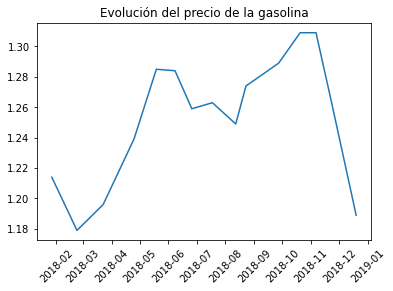

In [15]:
# Test de la función muestra_evolucion_precio
muestra_evolucion_precio(REGISTROS, 2018)